In [17]:
import subprocess as sub
import os
# Download danmaku from bilibili
bvid = "BV1EMZnY3Ee2"
cmd = sub.run(["BBDown", "--work-dir", "/tmp", "--danmaku-only", "-M", "<bvid>-<pageNumberWithZero>", "-F", "<bvid>", bvid])
cmd.check_returncode()

danmaku_file = [f"/tmp/{f}" for f in os.listdir("/tmp") if f.startswith(bvid) and f.endswith(".ass")]
danmaku_file

BBDown version 1.6.3, Bilibili Downloader.
遇到问题请首先到以下地址查阅有无相关信息：
https://github.com/nilaoda/BBDown/issues

[2025-07-27 11:03:28.810] - 检测账号登录...
[2025-07-27 11:03:28.810] - 加载本地cookie...
[2025-07-27 11:03:29.364] - 获取aid...
[2025-07-27 11:03:30.049] - 获取aid结束: 114256146071612
[2025-07-27 11:03:30.049] - 获取视频信息...
[2025-07-27 11:03:30.326] - 视频标题: 【直播回放】【歌回】俺唱歌很好听 2025年03月31日12点场
[2025-07-27 11:03:30.326] - 发布时间: 2025-03-31 17:36:26 -04:00
[2025-07-27 11:03:30.326] - UP主页: https://space.bilibili.com/697737710
[2025-07-27 11:03:30.326] - P1: [29163588973] [0-【歌回】俺唱歌很好听] [02h00m14s]
[2025-07-27 11:03:30.326] - P2: [29163589019] [1-【歌回】俺唱歌很好听] [02h27m57s]
[2025-07-27 11:03:30.326] - 共计 2 个分P, 已选择：ALL
[2025-07-27 11:03:30.326] - 开始解析P1: 114256146071612... (1 of 2)
[2025-07-27 11:03:31.253] - 共计5条视频流.
                            0. [1080P 高码率] [1920x1080] [AVC] [29.997] [3012 kbps] [~2.59 GB]
                            1. [1080P 高清] [1920x1080] [AVC] [29.997] [1893 kbps] [~1.63 GB]
        

['/tmp/BV1EMZnY3Ee2-1.ass', '/tmp/BV1EMZnY3Ee2-2.ass']

In [18]:
import pysubs2

subs = pysubs2.load(danmaku_file[0])
for line in subs:
    print(f"{line.start}  {line.end}  {line.text}")

104930  112930  {\move(1920, 0, -40, 0)}1
126640  134640  {\move(1920, 0, -160, 0)}两百舰！
180730  188730  {\move(1920, 0, -160, 0)}我超，爹
209970  217970  {\move(1920, 0, -160, 0)}好久不见
222480  230480  {\move(1920, 0, -320, 0)}看到了，没事没事
224230  232230  {\move(1920, 40, -280, 40)}爹你好好看啊爹
297230  305230  {\move(1920, 0, -80, 0)}嘻嘻
303580  311580  {\move(1920, 0, -80, 0)}蝶蝶
347530  355530  {\move(1920, 0, -200, 0)}狠狠扣私信
398560  406560  {\move(1920, 0, -480, 0)}没，午休呢，蝶蝶随意唱吧
425860  433860  {\move(1920, 0, -640, 0)}谁都不可能从我这里再借到一分钱。
452670  460670  {\move(1920, 0, -920, 0)}我没想要听什么歌，蝶蝶唱歌一直很好听，唱啥都听
480090  488090  {\move(1920, 0, -520, 0)}哇塞，美女这么会说话[花]
485860  493860  {\move(1920, 0, -40, 0)}好
580280  588280  {\move(1920, 0, -120, 0)}还真是
614570  622570  {\move(1920, 0, -120, 0)}你见过
620640  628640  {\move(1920, 0, -240, 0)}你还认错人了
622520  630520  {\move(1920, 0, -40, 0)}好
634530  642530  {\move(1920, 0, -360, 0)}鉴定为二次元[花]
639770  647770  {\move(1920, 0, -200, 0)}我天天来的
649600  657600  {\move(1920, 0, -1

In [ ]:
import polars as pl
import re

# Load pysubs2 data into polars dataframe
def load_danmaku_to_polars(subs):
    """
    Convert pysubs2 SubRip object to Polars DataFrame
    
    Args:
        subs: pysubs2.SSAFile object
    
    Returns:
        pl.DataFrame with columns: start_time, end_time, duration, text, start_seconds
    """
    data = []
    
    for line in subs:
        # Extract clean text (remove ASS formatting tags)
        clean_text = re.sub(r'\{[^}]*\}', '', line.text).strip()
        
        # Convert milliseconds to seconds
        start_seconds = line.start / 1000.0
        duration_seconds = (line.end - line.start) / 1000.0
        
        data.append({
            'start_time': line.start,  # milliseconds
            'end_time': line.end,      # milliseconds
            'duration': duration_seconds,
            'text': clean_text,
            'start_seconds': start_seconds
        })
    
    # Create Polars DataFrame
    df = pl.DataFrame(data)
    
    return df

df = load_danmaku_to_polars(subs)
df

start_time,end_time,duration,text,start_seconds
i64,i64,f64,str,f64
104930,112930,8.0,"""1""",104.93
126640,134640,8.0,"""两百舰！""",126.64
180730,188730,8.0,"""我超，爹""",180.73
209970,217970,8.0,"""好久不见""",209.97
222480,230480,8.0,"""看到了，没事没事""",222.48
…,…,…,…,…
7168970,7176970,8.0,"""这怎么在伸舌头""",7168.97
7183270,7191270,8.0,"""看他动态""",7183.27
7184520,7192520,8.0,"""伸舌头 可爱捏""",7184.52


In [23]:
# Restructure the dataframe to show danmaku frequency aggregated over a configurable window
def group_danmaku_by_window(df, interval_minutes=1):
    """
    Analyze danmaku frequency over time intervals
    
    Args:
        df: Polars DataFrame with danmaku data
        interval_minutes: Time interval in minutes for grouping
    
    Returns:
        pl.DataFrame with time_bucket and count columns
    """
    interval_seconds = interval_minutes * 60
    
    # Create time buckets and count danmaku per bucket
    frequency_df = (
        df
        .with_columns([
            # Create time buckets (floor division)
            (pl.col('start_seconds') // interval_seconds * interval_seconds).alias('time_bucket')
        ])
        .group_by('time_bucket')
        .agg([
            pl.count().alias('count')
        ])
        .sort('time_bucket')
    )
    
    return frequency_df

two_min_df = group_danmaku_by_window(df, interval_minutes=2)
two_min_df

/tmp/ipykernel_178583/2995361704.py:24: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('count')


time_bucket,count
f64,u32
0.0,1
120.0,5
240.0,3
360.0,3
480.0,3
…,…
6600.0,9
6720.0,46
6840.0,37


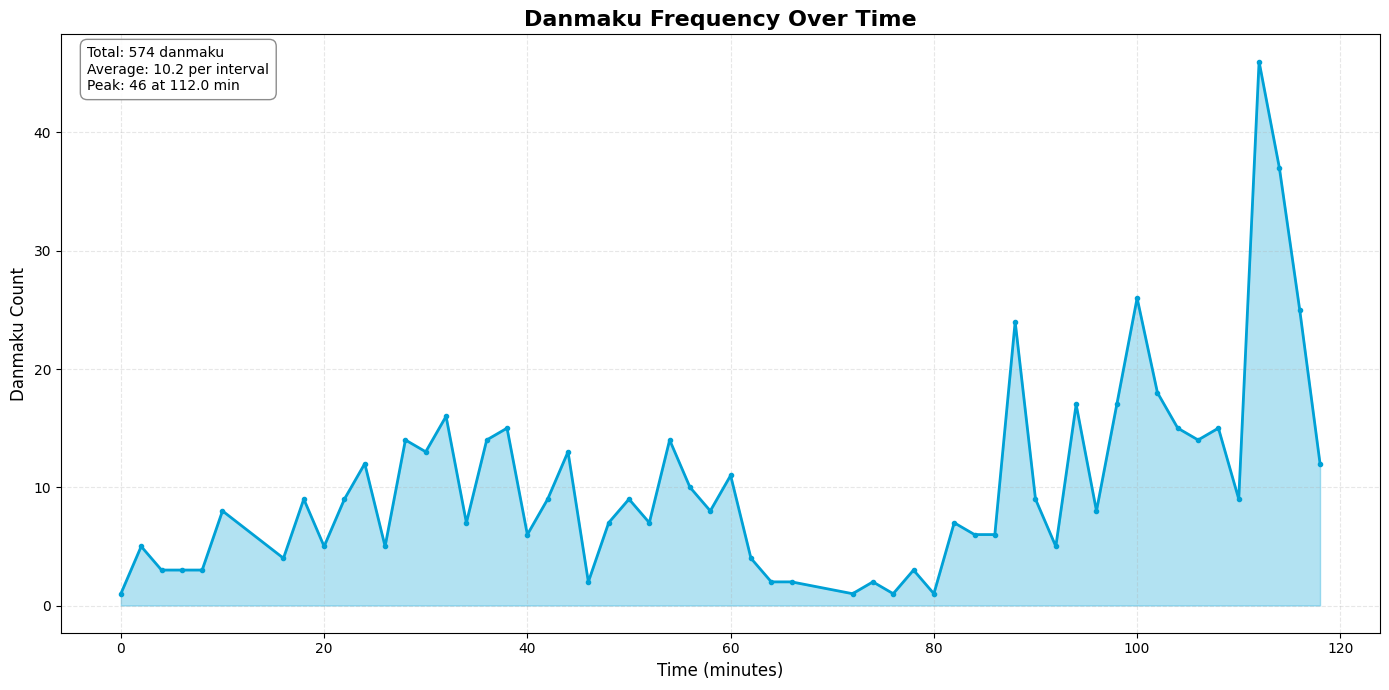

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_danmaku_frequency(frequency_df, title="Danmaku Frequency Over Time"):
    """
    Plot danmaku frequency using matplotlib
    
    Args:
        frequency_df: Polars DataFrame with time_bucket and count columns
        interval_minutes: Interval used for grouping
        title: Plot title
    """
    # Convert to numpy arrays for plotting
    time_buckets = frequency_df['time_bucket'].to_numpy()
    counts = frequency_df['count'].to_numpy()
    
    # Convert seconds to minutes for x-axis
    time_minutes = time_buckets / 60
    
    # Create the plot
    plt.figure(figsize=(14, 7))
    
    # Line plot with fill
    plt.plot(time_minutes, counts, linewidth=2, color='#00a1d6', marker='o', markersize=3)
    plt.fill_between(time_minutes, counts, alpha=0.3, color='#00a1d6')
    
    # Styling
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Time (minutes)', fontsize=12)
    plt.ylabel('Danmaku Count', fontsize=12)
    
    # Grid
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Statistics box
    total_danmaku = int(counts.sum())
    avg_per_interval = float(counts.mean())
    max_count = int(counts.max())
    peak_time = float(time_minutes[np.argmax(counts)])
    
    stats_text = (f'Total: {total_danmaku:,} danmaku\n'
                 f'Average: {avg_per_interval:.1f} per interval\n'
                 f'Peak: {max_count} at {peak_time:.1f} min')
    
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', 
             facecolor='white', alpha=0.9, edgecolor='gray'))
    
    # Improve layout
    plt.tight_layout()
    plt.show()
    
    return plt.gcf()

plot_danmaku_frequency(two_min_df)